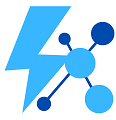 
#  Lab 3 - Gradient Descent - AI Faster 

### Problem 1

Tìm **global minimum** (cực tiểu của độ thì hàm số) của 2 đồ thị hàm số sau bằng **Gradient Descent** và biểu diễn cách hoạt động của thuật toán (visualization) sau đó vẽ biểu đồ mối quan hệ giữa cost value (đạo hàm) và iteration (số lần lặp):
>Đồ thị hàm parabol: $y = x^{2}$

>Đồ thị hàm trùng phương: $y = x^{4} - 2x^{2} - 3$

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [157]:
class vs:
    equation = {'parabol': (lambda x: x**2) ,  'coincident': (lambda x: x**4 - 2*x**2 - 3)}
    dev_equation = {'parabol': (lambda x: 2*x) ,  'coincident': (lambda x: 4*x**3 - 4*x)}
    def __init__(self, type_equation = 'parabol'):
        self.type_equation = type_equation
    def cost(self, x): 
        return self.equation[self.type_equation](x)
    def grad(self, x):
        return self.dev_equation[self.type_equation](x)
    def gradient_descent(self, x, learning_rate, max_iter = 200): 
        
        x_history = []
        y_history = []
        
        x_history.append(x)
        y_history.append(self.cost(x))
        gradient_old = 0.
        for i in range(max_iter):
            gradient = self.grad(x)
            x -= learning_rate * gradient
            
            if i%10 == 0:
                if gradient_old == gradient:
                    break
                gradient_old = gradient
                
            y = self.cost(x)
            x_history.append(x)
            y_history.append(y)
        self.x_history = x_history
        self.y_history = y_history
    def show_history(self):
        plt.plot(range(1, len(self.x_history)+1), self.y_history)
        plt.show()

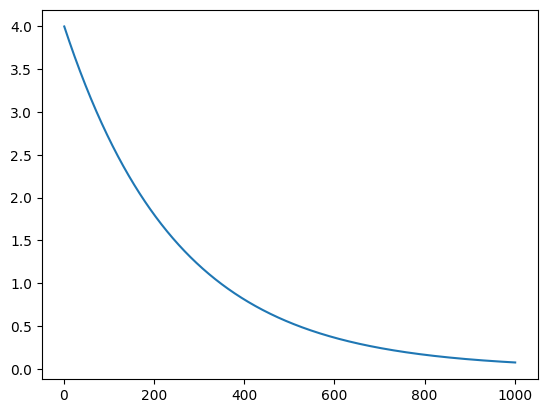

In [158]:
p1 = vs('parabol')
p1.gradient_descent(2, 0.001, 1000)
p1.show_history()

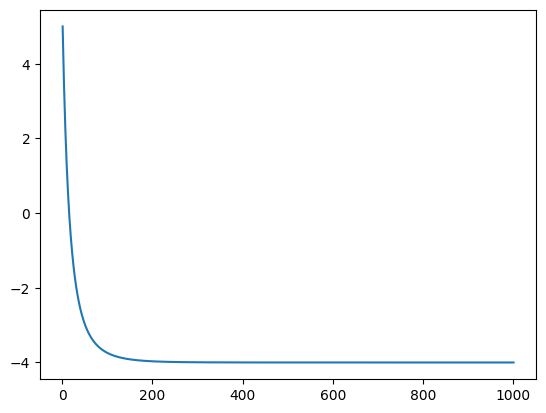

In [159]:
p2 = vs('coincident')
p2.gradient_descent(2, 0.001, 1000)
p2.show_history()

### Problem 2

Từ dữ liệu file *Data_female.txt* bạn hãy dùng **Gradient Descent** để dự đoán cân nặng dựa vào chiều cao, và trực quan hóa sau đó vẽ biểu đồ mối quan hệ giữa cost value (đạo hàm) và iteration (số lần lặp)

In [174]:
# Code ở đây cũng được
meta = pd.read_csv("Data_female.txt", sep="\t")


meta['Chiều cao'] = meta['Chiều cao'].apply(lambda x: float(x.replace('cm', '')))
meta['Cân nặng'] = meta['Cân nặng'].apply(lambda x: float(x.replace('kg', '')))

hs = np.max(meta['Chiều cao'])
ws = np.max(meta['Cân nặng'])

meta['Chiều cao'] /=hs
meta['Cân nặng'] /=ws

In [175]:
meta.head(5)

Chiều cao  Cân nặng
0   0.453431  0.212521
1   0.494485  0.168040
2   0.529412  0.156507
3   0.555760  0.275124
4   0.586397  0.278418

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(x, y, w, b):
    m = len(x)
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost =( 1 / (2 * m)) * cost
    return total_cost

def derivative(x, y, w, b):
    dw = 0.
    db = 0.
    m = len(x)
    for i in range(len(x)):
        
        y_hat = w * x[i] + b
        dw += (y_hat - y[i]) * x[i]
        db += (y_hat - y[i])
    return dw / m, db / m

def GD(x, y, w, b, alpha, num_iterations):
    cost = []
    w_values = np.zeros(num_iterations)
    b_values = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        dw, db = derivative(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost.append(cost_function(x, y, w, b))
        w_values[i] = w
        b_values[i] = b
        print(f'iter {i+1}: Cost = {cost[-1]}')
    
    id = np.argmin(cost)
    
    
    return w_values[id], b_values[id], cost

iter 1: Cost = 0.1502715178287154
iter 2: Cost = 0.11969214142220762
iter 3: Cost = 0.096506473179372
iter 4: Cost = 0.07892372979087539
iter 5: Cost = 0.06558687028706296
iter 6: Cost = 0.05546754008073551
iter 7: Cost = 0.04778646042570047
iter 8: Cost = 0.04195310020238588
iter 9: Cost = 0.03751995969251693
iter 10: Cost = 0.03414792719908049
iter 11: Cost = 0.031580026577496104
iter 12: Cost = 0.029621523330375762
iter 13: Cost = 0.028124849169541707
iter 14: Cost = 0.026978177972953443
iter 15: Cost = 0.026096768738703934
iter 16: Cost = 0.025416405346666893
iter 17: Cost = 0.024888425263758434
iter 18: Cost = 0.024475952337618432
iter 19: Cost = 0.024151042038605502
iter 20: Cost = 0.023892518147629514
iter 21: Cost = 0.02368433341595992
iter 22: Cost = 0.02351432728669364
iter 23: Cost = 0.023373284506286875
iter 24: Cost = 0.023254221748106124
iter 25: Cost = 0.023151847021614134
iter 26: Cost = 0.023062150017091002
iter 27: Cost = 0.022982091672228075
iter 28: Cost = 0.0229093

iter 12841: Cost = 0.003636152396294291
iter 12842: Cost = 0.0036361523962942927
iter 12843: Cost = 0.003636152396294293
iter 12844: Cost = 0.003636152396294292
iter 12845: Cost = 0.0036361523962942927
iter 12846: Cost = 0.0036361523962942927
iter 12847: Cost = 0.003636152396294291
iter 12848: Cost = 0.0036361523962942927
iter 12849: Cost = 0.0036361523962942927
iter 12850: Cost = 0.00363615239629429
iter 12851: Cost = 0.00363615239629429
iter 12852: Cost = 0.003636152396294291
iter 12853: Cost = 0.003636152396294291
iter 12854: Cost = 0.0036361523962942896
iter 12855: Cost = 0.0036361523962942927
iter 12856: Cost = 0.00363615239629429
iter 12857: Cost = 0.00363615239629429
iter 12858: Cost = 0.003636152396294291
iter 12859: Cost = 0.003636152396294291
iter 12860: Cost = 0.003636152396294291
iter 12861: Cost = 0.003636152396294292
iter 12862: Cost = 0.003636152396294291
iter 12863: Cost = 0.00363615239629429
iter 12864: Cost = 0.0036361523962942896
iter 12865: Cost = 0.0036361523962942

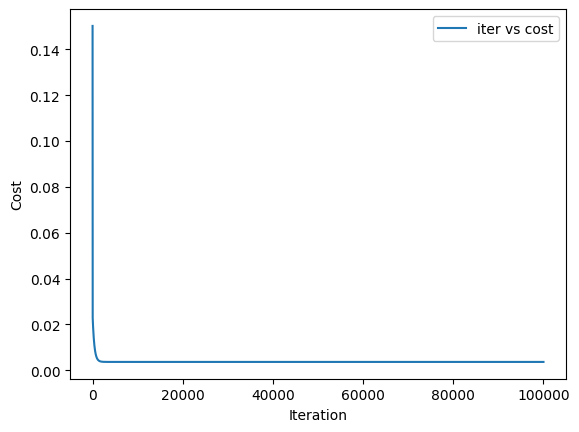

In [258]:
w, b, cost = GD(list(meta['Chiều cao']), list(meta['Cân nặng']), 0., 0.001, 0.0771, 100000)
plt.plot(list(range(len(cost))), list(cost), label='iter vs cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [264]:
for i in range(len(meta)):
    chieucao, cannang = meta.loc[i]
    print(f'chieucao = {chieucao*hs} \n y hat = {(w*chieucao + b)*ws} \n y = {cannang*ws}')

chieucao = 74.0 
 y hat = 1.0928908796960837 
 y = 12.9
chieucao = 80.7 
 y hat = 4.796806022390733 
 y = 10.2
chieucao = 86.40000000000002 
 y hat = 7.9478980094593155 
 y = 9.5
chieucao = 90.7 
 y hat = 10.325037578651399 
 y = 16.7
chieucao = 95.7 
 y hat = 13.089153356781729 
 y = 16.9
chieucao = 99.0 
 y hat = 14.913469770347755 
 y = 13.0
chieucao = 102.7 
 y hat = 16.958915446164205 
 y = 15.100000000000001
chieucao = 106.2 
 y hat = 18.893796490855436 
 y = 20.2
chieucao = 109.4 
 y hat = 20.662830588858853 
 y = 15.200000000000001
chieucao = 112.20000000000002 
 y hat = 22.210735424611848 
 y = 18.1
chieucao = 115.1 
 y hat = 23.813922575927432 
 y = 25.2
chieucao = 118.00000000000001 
 y hat = 25.41710972724303 
 y = 19.2
chieucao = 120.8 
 y hat = 26.965014562996014 
 y = 22.4
chieucao = 123.7 
 y hat = 28.568201714311613 
 y = 24.6
chieucao = 126.6 
 y hat = 30.171388865627197 
 y = 22.0
chieucao = 129.5 
 y hat = 31.774576016942795 
 y = 28.6
chieucao = 132.5 
 y hat = 33.

In [263]:
print(f'y hat = {(w*(150/hs) + b)*ws} \n y = {cannang*ws}')

y hat = 43.10745070727717 
 y = 60.0


### Problem 3

Từ 2 list dữ liệu dưới đây hãy vẽ một đường parabol bằng Linear Regression và một đường parabol bằng **Gradient Descent** sau đó dựa đoán label dựa vào data có sẵn và vẽ biểu đồ mối quan hệ giữa cost value (đạo hàm) và iteration (số lần lặp)

> **label** = [2,5,7,9,11,16,19,23,22,29,29,35,37,40,46,42,39,31,30,28,20,15,10,6]

> **data** = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

In [138]:
# Code ở đây cũng được
y= np.array([2,5,7,9,11,16,19,23,22,29,29,35,37,40,46,42,39,31,30,28,20,15,10,6])
x = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], dtype='float')


In [139]:
x /=np.max(x)


iter 1: Cost = 76.79006901625912
iter 2: Cost = 73.12012707102686
iter 3: Cost = 72.9530312316338
iter 4: Cost = 72.84357125516964
iter 5: Cost = 72.74529101076013
iter 6: Cost = 72.6565666765251
iter 7: Cost = 72.57646274209671
iter 8: Cost = 72.5041415709951
iter 9: Cost = 72.4388470019419
iter 10: Cost = 72.37989634221177
iter 11: Cost = 72.32667322835988
iter 12: Cost = 72.27862118176597
iter 13: Cost = 72.23523779032655
iter 14: Cost = 72.19606945544389
iter 15: Cost = 72.16070664938894
iter 16: Cost = 72.12877963345048
iter 17: Cost = 72.09995459210194
iter 18: Cost = 72.0739301427658
iter 19: Cost = 72.05043418468335
iter 20: Cost = 72.02922105394308
iter 21: Cost = 72.0100689549214
iter 22: Cost = 71.99277764128045
iter 23: Cost = 71.97716632227613
iter 24: Cost = 71.9630717724857
iter 25: Cost = 71.95034662519099
iter 26: Cost = 71.93885783157357
iter 27: Cost = 71.9284852696121
iter 28: Cost = 71.91912048813656
iter 29: Cost = 71.91066557290826
iter 30: Cost = 71.903032122869

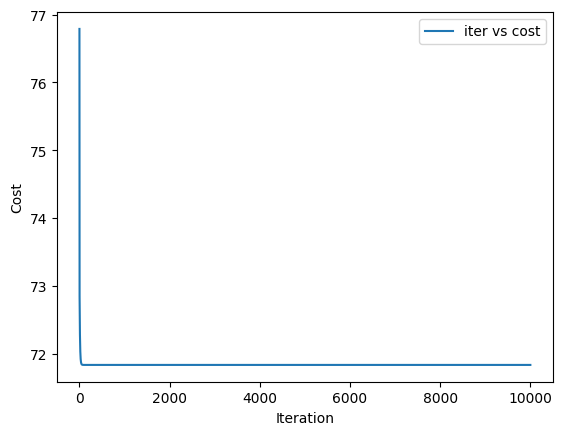

In [155]:
w, b, cost = GD(x, y, 0.000001, 0.000001, 0.8511, 10000)
plt.plot(list(range(len(cost))), list(cost), label='iter vs cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Problem 4

Từ dữ liệu file *Data_GPA_Stanford.txt* bạn hãy dùng **Gradient Descent** để dự đoán Điểm GPA của một sinh viên dựa vào chỉ số IQ và thời gian học trong một ngày của sinh viên đó (Bài này không bắt buộc visualization).

In [107]:
# Code ở đây cũng được
data = pd.read_csv("Data_GPA_Stanford.txt", sep="\t")
data.head(5)

IQ  hours per day   GPA
0   97             16  3.08
1  115             14  3.27
2  100              4  2.22
3   91              8  2.35
4  135             13  3.58

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(x, y, w, b):
    m = len(x)
    cost = 0

    for i in range(m):
        f_wb = w @ x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost[0]
def derivative(x, y, w, b):
    dw = 0
    db = 0
    m = len(x)
    for i in range(len(x)):
        y_hat =x[i].reshape(1, -1) @ w.T + b
        dw += (y_hat - y[i]) @ x[i].reshape(1, -1)
        db += (y_hat - y[i])
    return dw.reshape(1, -1) / m, db.reshape(1, -1) / m

def GD(x, y, w, b, alpha, num_iterations):
    cost = np.zeros(num_iterations)
    w_values = []
    b_values = []
    m = len(x)
    
    for i in range(num_iterations):
        dw, db = derivative(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db[0][0]
        
        cost[i] = cost_function(x, y, w, b)
        w_values.extend(w)
        b_values.append(b)
        print(f'iter {i}: Cost = {cost[i]}')
    id = np.argmin(cost)
    plt.plot(range(len(cost)), cost,  label='w vs cost')
    return w_values[id], b_values[id]

iter 0: Cost = 0.6809470977025894
iter 1: Cost = 0.1538526215585991
iter 2: Cost = 0.07423838704544142
iter 3: Cost = 0.06202545070552252
iter 4: Cost = 0.05996558658161254
iter 5: Cost = 0.05943595257124709
iter 6: Cost = 0.059137755467511655
iter 7: Cost = 0.05887536441846094
iter 8: Cost = 0.05861930902653278
iter 9: Cost = 0.05836514631929579
iter 10: Cost = 0.058112203020948584
iter 11: Cost = 0.05786037367227346
iter 12: Cost = 0.057609638357227065
iter 13: Cost = 0.057359990061915216
iter 14: Cost = 0.05711142373318623
iter 15: Cost = 0.05686393463053987
iter 16: Cost = 0.056617518077813615
iter 17: Cost = 0.05637216942570637
iter 18: Cost = 0.056127884046059284
iter 19: Cost = 0.05588465733092044
iter 20: Cost = 0.05564248469233005
iter 21: Cost = 0.05540136156221452
iter 22: Cost = 0.055161283392297616
iter 23: Cost = 0.0549222456540141
iter 24: Cost = 0.05468424383842428
iter 25: Cost = 0.05444727345612899
iter 26: Cost = 0.05421133003718483
iter 27: Cost = 0.0539764091310198

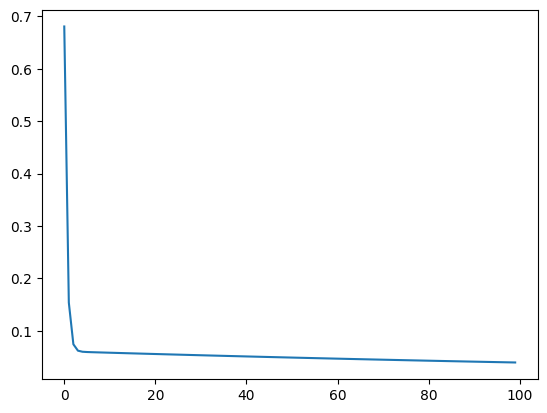

In [109]:
import random
random.uniform(-1, 1)
w = np.array([0. for i in range(data.shape[1]-1)]).reshape(1, -1)
b = 0
w, b = GD(np.array(data[data.columns.difference(['GPA'])]), np.array(data[['GPA']]), w, b, 0.0001, 100)